In [22]:
import sys
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

random.seed(42)

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '../../'))

try:
    sys.path.insert(0, parent_dir)
    from src.image_processing import apply_clahe, equalize_v_channel, pseudo_color
    from src.color_utils import apply_hsv_transfer, apply_sepia_filter
    from src.visualization import compare_results, plot_histogram
    print(f"✓ Imports successful from {parent_dir}")
except ImportError as e:
    print(f"✗ Import Error: {e}")

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)

✓ Imports successful from c:\Users\infom\Desktop\img_processing


✓ Loaded Reference Palette: peppers.jpg
✓ Found 710 images to process.
c:\Users\infom\Desktop\img_processing\images\colorization\89.illustration-of-natural-landscape-graphics-3952025-1-1-580x412.jpg

Processing: 89.illustration-of-natural-landscape-graphics-3952025-1-1-580x412.jpg


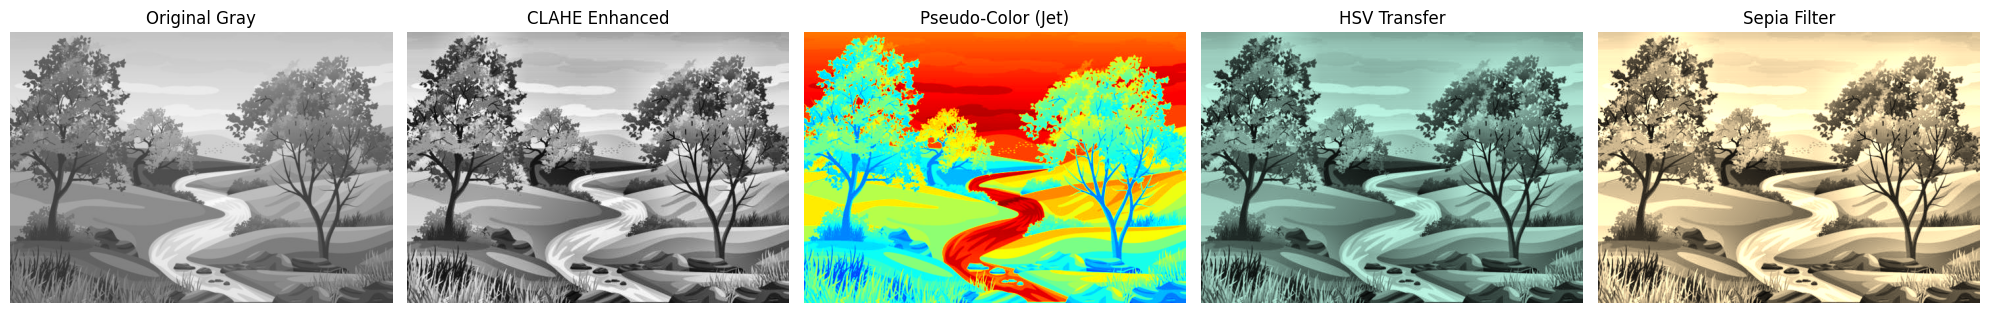

c:\Users\infom\Desktop\img_processing\images\colorization\23.dsc_0063.jpg

Processing: 23.dsc_0063.jpg


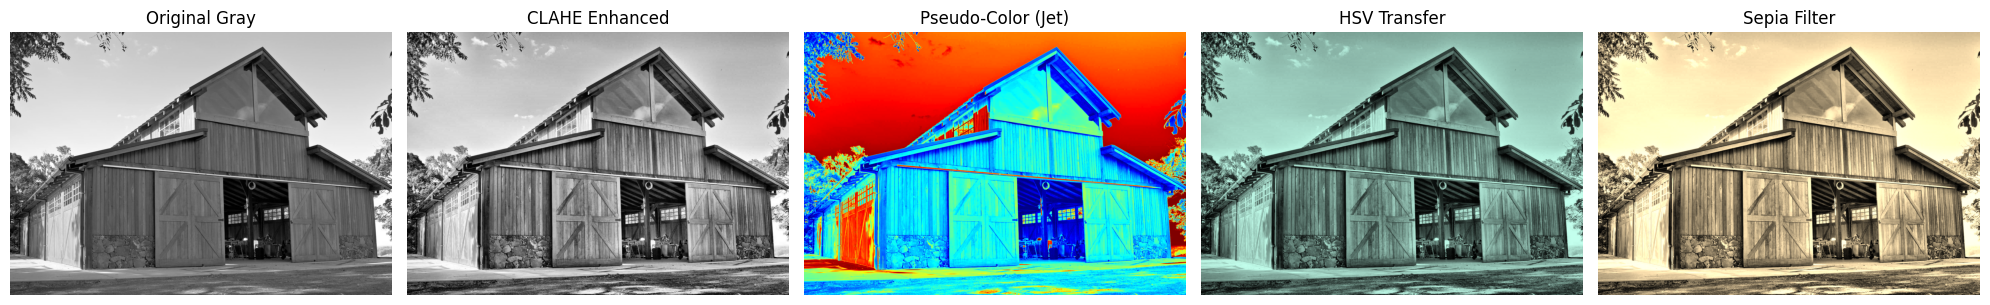

c:\Users\infom\Desktop\img_processing\images\colorization\12.blue-sky-background-and-white-clouds-soft-focus-and-copy-space-picture-id1128410927.jpg

Processing: 12.blue-sky-background-and-white-clouds-soft-focus-and-copy-space-picture-id1128410927.jpg


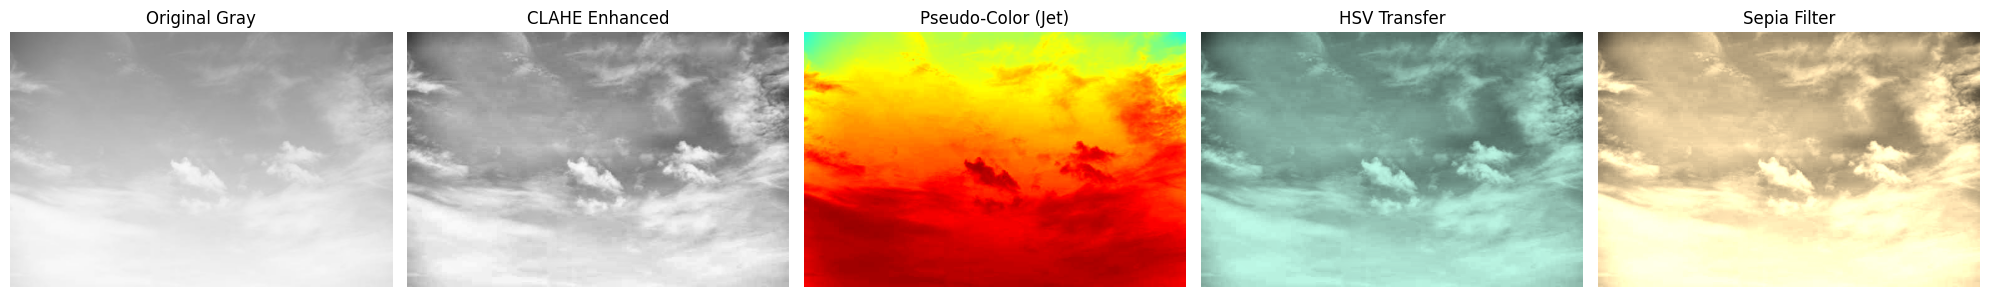

c:\Users\infom\Desktop\img_processing\images\colorization\44.category-drive-button-large-built-1800-medium.jpg

Processing: 44.category-drive-button-large-built-1800-medium.jpg


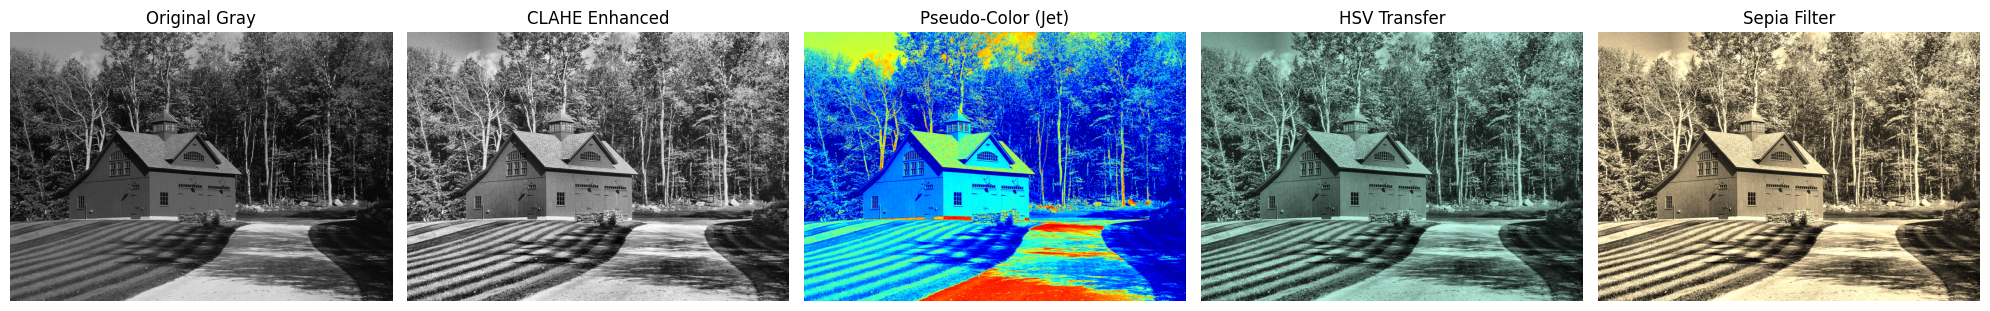

c:\Users\infom\Desktop\img_processing\images\colorization\40.morning-sky-looked-like-bright-260nw-1938508552.jpg

Processing: 40.morning-sky-looked-like-bright-260nw-1938508552.jpg


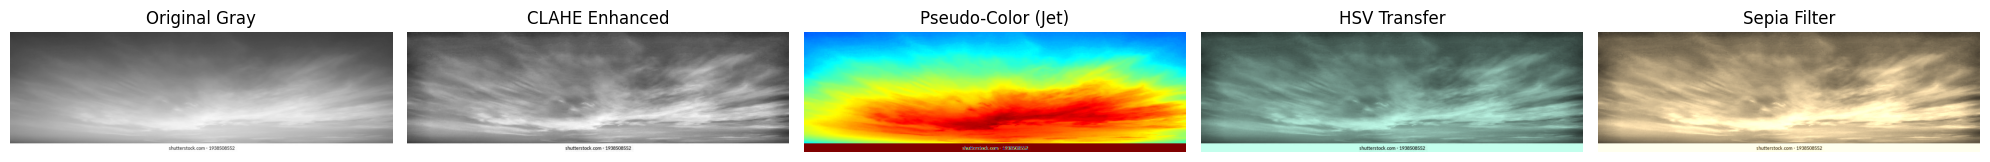

In [23]:
INPUT_DIR = Path(os.path.join(parent_dir, 'images', 'colorization'))
REF_IMG_PATH = Path(os.path.join(parent_dir, 'images', 'input', 'peppers.jpg')) # Use any colorful image as reference

if REF_IMG_PATH.exists():
    reference_img = cv.imread(str(REF_IMG_PATH))
    print(f"✓ Loaded Reference Palette: {REF_IMG_PATH.name}")
else:
    print(f"⚠ Reference not found. Using random colors.")
    reference_img = np.random.randint(0, 255, (100,100,3), dtype=np.uint8)

# Check Input Directory
image_files = []
if INPUT_DIR.exists():
    image_files = [f for f in INPUT_DIR.glob('*') if f.suffix.lower() in {'.jpg', '.png', '.jpeg'}]
    print(f"✓ Found {len(image_files)} images to process.")
else:
    print(f"✗ Error: {INPUT_DIR} does not exist.")

# --- BATCH PROCESSING ---


for img_path in random.sample(image_files, 5):
    print(img_path) # Process first 5 images
    gray_original = cv.imread(str(img_path), cv.IMREAD_GRAYSCALE)
    
    if gray_original is None: continue
    print(f"\nProcessing: {img_path.name}")

    gray_bgr = cv.cvtColor(gray_original, cv.COLOR_GRAY2BGR)
    enhanced_bgr = apply_clahe(gray_bgr, clip_limit=3.0, tile_grid=(8,8))
    pseudo_res = pseudo_color(gray_original, colormap='jet')

    transfer_res = apply_hsv_transfer(enhanced_bgr, reference_img)
    sepia_res = apply_sepia_filter(enhanced_bgr) 
    compare_results(
        [gray_bgr, enhanced_bgr, pseudo_res, transfer_res, sepia_res],
        ["Original Gray", "CLAHE Enhanced", "Pseudo-Color (Jet)", "HSV Transfer", "Sepia Filter"],
        figsize=(20, 5)
    )

Analyzing Channel Distribution of the Colorized Result:


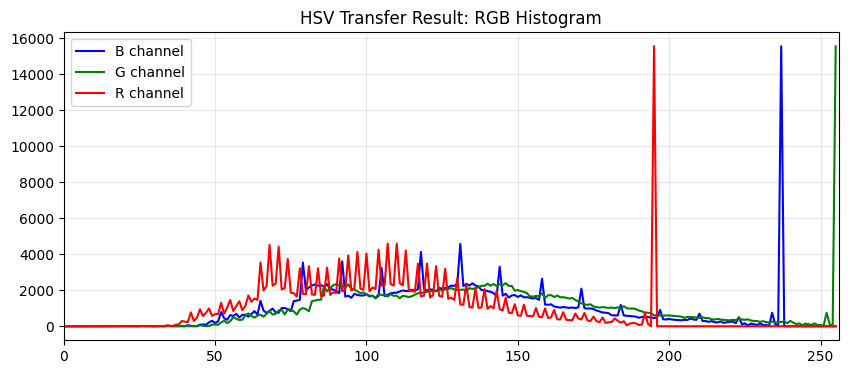

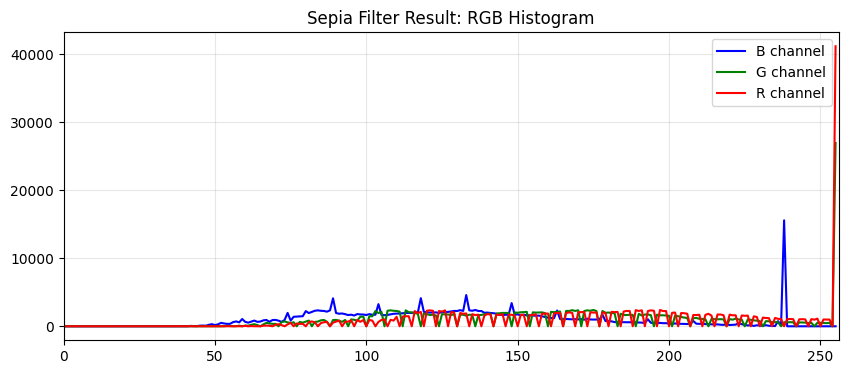

In [24]:
if 'transfer_res' in locals():
    print("Analyzing Channel Distribution of the Colorized Result:")
    
    # Use your imported histogram function
    plot_histogram(transfer_res, title="HSV Transfer Result: RGB Histogram")
    
    # Comparison: The Sepia filter pushes Red and Green higher than Blue
    plot_histogram(sepia_res, title="Sepia Filter Result: RGB Histogram")